<a href="https://colab.research.google.com/github/Delonix7/Data_Science_Essentials/blob/main/Web_Scraping_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scraping Wikipedia

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives'
table_id = 'votingmembers'

response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
congress_table = soup.find('table', attrs= {'id' : table_id})

In [4]:
df_main = pd.read_html(str(congress_table))

In [5]:
df = df_main[0].copy()

In [6]:
df.drop(columns = 'Party', inplace =True)

In [7]:
df

,District,Member,Party.1,Prior experience,Education,Assumed office,Residence,Born[2]
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,(age 64)
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)Auburn ...,2021,Enterprise,(age 56)
2,Alabama 3,Mike Rogers,Republican,Calhoun County CommissionerAlabama House of Re...,"Jacksonville State University (BA, MPA)Birming...",2003,Anniston[3],(age 64)
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North AlabamaBirmingham–Southern...,1997,Haleyville,(age 57)
4,Alabama 5,Mo Brooks,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,(age 68)
...,...,...,...,...,...,...,...,...
430,Wisconsin 5,Scott Fitzgerald,Republican,Wisconsin State Senate,University of Wisconsin–Oshkosh (BS),2021,Clyman[96],(age 58)
431,Wisconsin 6,Glenn Grothman,Republican,Wisconsin SenateWisconsin State Assembly,"University of Wisconsin–Madison (BA, JD)",2015,Glenbeulah[97],(age 67)
432,Wisconsin 7,Tom Tiffany,Republican,Wisconsin SenateWisconsin State Assembly,University of Wisconsin–River Falls (BS),2020 (special),Minocqua,(age 64)
433,Wisconsin 8,Mike Gallagher,Republican,Political advisorU.S. Marine Corps,Princeton University (BA)National Intelligence...,2017,Green Bay,(age 38)


##Scraping Continental records table of 100 meters track event from Wikipedia

In [8]:
url = 'https://en.wikipedia.org/wiki/100_metres'
response = requests.get(url).content
soup_100 = BeautifulSoup(response, 'html.parser')

In [9]:
locators  = 'div.mw-parser-output table.wikitable'
table = soup_100.select_one(locators)

In [10]:
df_main = pd.read_html(str(table))
df = df_main[0].copy()
df

Area       Men             \
                                             Area  Time (s) Wind (m/s)   
0                                Africa (records)   9.77[A]        1.2   
1                                  Asia (records)      9.83        0.9   
2                                Europe (records)      9.80        0.1   
3  North, Central America and Caribbean (records)   9.58 WR        0.9   
4                               Oceania (records)      9.93        1.8   
5                         South America (records)  10.00[A]        1.6   

                                     Women             \
              Athlete     Nation  Time (s) Wind (m/s)   
0  Ferdinand Omanyala      Kenya     10.72       +1.4   
1         Su Bingtian      China     10.79        0.0   
2      Marcell Jacobs      Italy     10.73       +2.0   
3          Usain Bolt    Jamaica  10.49 WR     0.0[a]   
4     Patrick Johnson  Australia     11.08       +0.7   
5     Robson da Silva     Brazil     10.91       −0.2   

                                            
                    Athlete         Nation  
0        Marie-Josée Ta Lou    Ivory Coast  
1                 Li Xuemei          China  
2           Christine Arron         France  
3  Florence Griffith-Joyner  United States  
4                 Zoe Hobbs    New Zealand  
5          Rosângela Santos         Brazil

#Scraping all time top 25 men 100 meters

In [11]:
locator2 = 'div.mw-parser-output table.wikitable.sortable'

In [12]:
table_2 = soup_100.select_one(locator2)

In [13]:
df2 = pd.read_html(str(table_2))

In [14]:
df2 = df2[0]

In [15]:
df2

,Ath.#,Perf.#,Time (s),Wind (m/s),Athlete,Nation,Date,Place,Ref
0,1.0,1.0,9.58,+0.9,Usain Bolt,Jamaica,16 AUG 2009,Berlin,[26]
1,NaN,2.0,9.63,+1.5,Bolt #2,NaN,05 AUG 2012,London,NaN
2,NaN,3.0,9.69,±0.0,Bolt #3,NaN,16 AUG 2008,Beijing,NaN
3,2.0,3.0,9.69,+2.0,Tyson Gay,United States,20 SEP 2009,Shanghai,[27]
4,2.0,3.0,9.69,−0.1,Yohan Blake,Jamaica,23 AUG 2012,Lausanne,[28]
5,NaN,6.0,9.71,+0.9,Gay #2,NaN,16 AUG 2009,Berlin,[26]
6,NaN,7.0,9.72,+1.7,Bolt #4,NaN,31 MAY 2008,New York City,NaN
7,4.0,7.0,9.72,+0.2,Asafa Powell,Jamaica,02 SEP 2008,Lausanne,[29]
8,NaN,9.0,9.74,+1.7,Powell #2,NaN,09 SEP 2007,Rieti,NaN
9,5.0,9.0,9.74,+0.9,Justin Gatlin,United States,15 MAY 2015,Doha,[30]


In [16]:
df2.shape

(59, 9)

In [17]:
df2.columns = ['athlete_num', 'performance', 'time(s)', 'wind(m/s)', 'athlete', 'nation', 'date', 'place', 'ref'] #adding new columns

In [18]:
df2.drop(['athlete_num', 'ref'], axis = 1, inplace = True) #dropping unwanted columns

In [19]:
#making the athlete column consistent
df2.loc[df2['athlete'].str.contains('Bolt'), 'athlete'] = 'Usain Bolt'
df2.loc[df2['athlete'].str.contains('Gay'), 'athlete'] = 'Tyson Gay'
df2.loc[df2['athlete'].str.contains('Blake'), 'athlete'] = 'Yohan Blake'
df2.loc[df2['athlete'].str.contains('Gatlin'), 'athlete'] = 'Justin Gatlin'
df2.loc[df2['athlete'].str.contains('Powell'), 'athlete'] = 'Asafa Powell'
df2.loc[df2['athlete'].str.contains('Bromell'), 'athlete'] = 'Trayvon Bromell'
df2.loc[df2['athlete'].str.contains('Kerley'), 'athlete'] = 'Fred Kerley'

In [20]:
#fixing NaN values in nation column
df2_no_nan = df2.dropna(subset = ['nation'], axis = 0)
at_nation = dict(list(zip(df2_no_nan.athlete, df2_no_nan.nation))) #a dictionary with key = athlete and value = nation
df2['nation'] = df2['athlete'].map(at_nation) #maps athlete in dictionary to table

In [21]:
df2.shape

(59, 7)

In [22]:
df2['time(s)'].replace('9.77[A]', 9.77, inplace = True)
df2['time(s)'].replace('9.76[A]', 9.76, inplace = True)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   performance  34 non-null     float64
 1   time(s)      59 non-null     object 
 2   wind(m/s)    59 non-null     object 
 3   athlete      59 non-null     object 
 4   nation       59 non-null     object 
 5   date         59 non-null     object 
 6   place        59 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.4+ KB


In [24]:
df2['time(s)'] = df2['time(s)'].astype(float)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   performance  34 non-null     float64
 1   time(s)      59 non-null     float64
 2   wind(m/s)    59 non-null     object 
 3   athlete      59 non-null     object 
 4   nation       59 non-null     object 
 5   date         59 non-null     object 
 6   place        59 non-null     object 
dtypes: float64(2), object(5)
memory usage: 3.4+ KB


In [26]:
df2

,performance,time(s),wind(m/s),athlete,nation,date,place
0,1.0,9.58,+0.9,Usain Bolt,Jamaica,16 AUG 2009,Berlin
1,2.0,9.63,+1.5,Usain Bolt,Jamaica,05 AUG 2012,London
2,3.0,9.69,±0.0,Usain Bolt,Jamaica,16 AUG 2008,Beijing
3,3.0,9.69,+2.0,Tyson Gay,United States,20 SEP 2009,Shanghai
4,3.0,9.69,−0.1,Yohan Blake,Jamaica,23 AUG 2012,Lausanne
5,6.0,9.71,+0.9,Tyson Gay,United States,16 AUG 2009,Berlin
6,7.0,9.72,+1.7,Usain Bolt,Jamaica,31 MAY 2008,New York City
7,7.0,9.72,+0.2,Asafa Powell,Jamaica,02 SEP 2008,Lausanne
8,9.0,9.74,+1.7,Asafa Powell,Jamaica,09 SEP 2007,Rieti
9,9.0,9.74,+0.9,Justin Gatlin,United States,15 MAY 2015,Doha


In [27]:
best_times ={}
for athlete in df2_no_nan.athlete:
  best_times[athlete] = df2.loc[df2['athlete'] == athlete, 'time(s)'].min()

best_times_df = pd.DataFrame.from_dict(best_times, orient = 'index')
best_times_df.reset_index(inplace = True)
best_times_df.columns = ['athlete', 'best time(s)']

In [28]:
best_times_df.athlete = [x.split(' ')[1] for x in best_times_df['athlete']]

In [29]:
best_times_df

,athlete,best time(s)
0,Bolt,9.58
1,Gay,9.69
2,Blake,9.69
3,Powell,9.72
4,Gatlin,9.74
5,Coleman,9.76
6,Bromell,9.76
7,Kerley,9.76
8,Omanyala,9.77
9,Carter,9.78


In [30]:
best_times_df = best_times_df.reindex(index = best_times_df.index[::-1])

In [31]:
best_times_df.reset_index(inplace = True)

In [32]:
best_times_df

,index,athlete,best time(s)
0,33,Williams,9.86
1,32,Seville,9.86
2,31,Norman,9.86
3,30,Oduduru,9.86
4,29,Lyles,9.86
5,28,Vicaut,9.86
6,27,Bledman,9.86
7,26,Obikwelu,9.86
8,25,Boldon,9.86
9,24,Fredericks,9.86


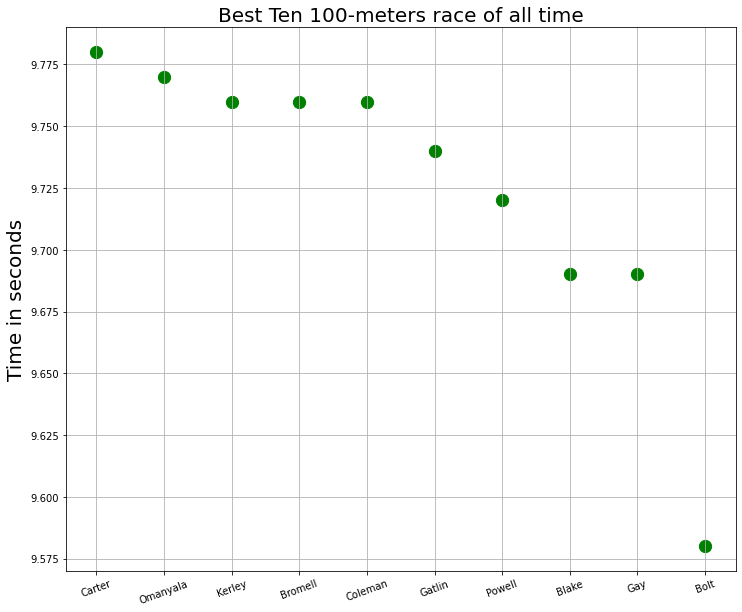

In [33]:
plt.figure(figsize = (12,10))
plt.scatter(data = best_times_df[24:], x = 'athlete', y = 'best time(s)', s =150, c = 'green')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xticks(rotation =20)
plt.grid(axis = 'both')
plt.ylabel('Time in seconds', size =20)
plt.title('Best Ten 100-meters race of all time', size =20)
plt.show()

##Extracting EPL related information from Wikipedia

In [ ]:
url = 'https://en.wikipedia.org/wiki/2021%E2%80%9322_Premier_League'
page = requests.get(url).content

soup_epl = BeautifulSoup(page, 'html.parser')

In [ ]:
html_table = soup_epl.find_all('table', attrs={'class' : 'wikitable'})

In [ ]:
# html_table = soup_epl.select('table.wikitable')

In [ ]:
type(html_table)

bs4.element.ResultSet

In [ ]:
df_epl = pd.read_html(str(html_table))

In [ ]:
len(df_epl)

12

In [ ]:
d = {}

In [ ]:
for i in range(0,12):
 d[f'df_epl_{i}'] = df_epl[i]

In [ ]:
d.keys()

dict_keys(['df_epl_0', 'df_epl_1', 'df_epl_2', 'df_epl_3', 'df_epl_4', 'df_epl_5', 'df_epl_6', 'df_epl_7', 'df_epl_8', 'df_epl_9', 'df_epl_10', 'df_epl_11'])

In [ ]:
d['df_epl_8']

,Rank,Player,Club,Clean sheets[155]
0,1,Alisson,Liverpool,20
1,1,Ederson,Manchester City,20
2,3,Hugo Lloris,Tottenham Hotspur,16
3,4,Édouard Mendy,Chelsea,14
4,5,Aaron Ramsdale,Arsenal,12
5,6,Vicente Guaita,Crystal Palace,11
6,6,Emiliano Martínez,Aston Villa,11
7,6,José Sá,Wolverhampton Wanderers,11
8,6,Robert Sánchez,Brighton & Hove Albion,11
9,10,Nick Pope,Burnley,9


In [ ]:
d['df_epl_3']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,29,6,3,99,26,+73,93,Qualification for the Champions League group s...
1,2,Liverpool,38,28,8,2,94,26,+68,92,Qualification for the Champions League group s...
2,3,Chelsea,38,21,11,6,76,33,+43,74,Qualification for the Champions League group s...
3,4,Tottenham Hotspur,38,22,5,11,69,40,+29,71,Qualification for the Champions League group s...
4,5,Arsenal,38,22,3,13,61,48,+13,69,Qualification for the Europa League group stag...
5,6,Manchester United,38,16,10,12,57,57,0,58,Qualification for the Europa League group stag...
6,7,West Ham United,38,16,8,14,60,51,+9,56,Qualification for the Europa Conference League...
7,8,Leicester City,38,14,10,14,62,59,+3,52,NaN
8,9,Brighton & Hove Albion,38,12,15,11,42,44,−2,51,NaN
9,10,Wolverhampton Wanderers,38,15,6,17,38,43,−5,51,NaN


##Scraping EPL site

In [ ]:
def epl_tables(url, data_compseason):
  url = url
  page = requests.get(url).content
  soup_epl2 = BeautifulSoup(page, 'html.parser')
  table = soup_epl2.find_all('tr', attrs= {'data-compseason': data_compseason}) #finding all tr tags with data-compseason = 489

  position, club = ([] for i in range(2))
  for i in range(len(table)):
    club.append(table[i]['data-filtered-table-row-name'])
    position.append(table[i]['data-position'])

  epl_table = pd.DataFrame()
  played, won, drawn, lost, gf, ga, gd, points = ([] for i in range(8))

  for i in range(20):
    try:
      played.append(table[i].find_all('td')[3].string)
      won.append(table[i].find_all('td')[4].string)
      drawn.append(table[i].find_all('td')[5].string)
      lost.append(table[i].find_all('td')[6].string)
      gf.append(table[i].find_all('td')[7].string)
      ga.append(table[i].find_all('td')[8].string)
      gd.append(table[i].find_all('td')[9].string)
      points.append(table[i].find_all('td')[10].string)
    
    except IndexError as e:
      return (f'Site HTML has probably been changed. An error occured {e}')

  lists = [position, club, played, won, drawn, lost, gf, ga, gd, points]
  epl_table = pd.concat([pd.Series(x) for x in lists], axis = 1, keys = ['position', 'club', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points'])
  epl_table['gf'] = epl_table['gf'].astype(int)
  epl_table['ga'] = epl_table['ga'].astype(int)
  epl_table['gd'] = epl_table['gf'] - epl_table['ga']
  return epl_table

In [ ]:
url = 'https://www.premierleague.com/tables?team=FIRST'

In [ ]:
epl_tables(url, 489)

,position,club,played,won,drawn,lost,gf,ga,gd,points
0,1,Arsenal,7,6,0,1,17,7,10,18
1,2,Manchester City,7,5,2,0,23,6,17,17
2,3,Tottenham Hotspur,7,5,2,0,18,7,11,17
3,4,Brighton and Hove Albion,6,4,1,1,11,5,6,13
4,5,Manchester United,6,4,0,2,8,8,0,12
5,6,Fulham,7,3,2,2,12,11,1,11
6,7,Chelsea,6,3,1,2,8,9,-1,10
7,8,Liverpool,6,2,3,1,15,6,9,9
8,9,Brentford,7,2,3,2,15,12,3,9
9,10,Newcastle United,7,1,5,1,8,7,1,8


#Getting Data on Largest Pharma Companies by market cap

In [ ]:
url = 'https://companiesmarketcap.com/pharmaceuticals/largest-pharmaceutical-companies-by-market-cap/'
response = requests.get(url).content
pharma_soup = BeautifulSoup(response, 'html.parser')

In [ ]:
# print(pharma_soup.prettify())

In [ ]:
table = pharma_soup.find_all('table', attrs = {'class': 'default-table table marketcap-table dataTable'})

In [ ]:
df_pharma = pd.read_html(str(table))

In [ ]:
pharma_table = pd.DataFrame(df_pharma[0])

In [ ]:
pharma_table.drop(columns = 'Price (30 days)', inplace= True)

In [ ]:
pharma_table['Country'].unique()

array(['🇺🇸 USA', '🇨🇭 Switzerland', '🇩🇰 Denmark', '🇬🇧 UK', '🇫🇷 France',
       '🇦🇺 Australia', '🇩🇪 Germany', '🇯🇵 Japan', '🇨🇳 China', '🇮🇳 India',
       '🇳🇱 Netherlands', '🇰🇷 S. Korea', '🇮🇪 Ireland', '🇮🇱 Israel',
       '🇮🇹 Italy', '🇫🇮 Finland', '🇸🇪 Sweden', '🇿🇦 South Africa'],
      dtype=object)

In [ ]:
pharma_table.head(10)

,Rank,Name,Market Cap,Price,Today,Country
0,1,Johnson & Johnson JNJ,$437.39 B,$166.36,0.86%,🇺🇸 USA
1,2,Eli Lilly LLY,$317.71 B,$334.38,7.48%,🇺🇸 USA
2,3,Roche ROG.SW,$269.07 B,$327.50,1.04%,🇨🇭 Switzerland
3,4,AbbVie ABBV,$255.66 B,$144.60,2.03%,🇺🇸 USA
4,5,Pfizer PFE,$249.35 B,$44.43,0.77%,🇺🇸 USA
5,6,Novo Nordisk NVO,$225.00 B,$99.36,3.61%,🇩🇰 Denmark
6,7,Merck MRK,$219.83 B,$86.78,1.10%,🇺🇸 USA
7,8,Astrazeneca AZN,$180.30 B,$54.69,2.72%,🇬🇧 UK
8,9,Novartis NVS,$166.98 B,$76.32,2.24%,🇨🇭 Switzerland
9,10,Bristol-Myers Squibb BMY,$153.86 B,$72.06,2.42%,🇺🇸 USA
